In [1]:
import numpy as np
import matplotlib.pyplot as plt

In this first part we implement the 1D version of the Gross-Pitaevskii for Bosons in the potential of a Harmonic Trap. The implementation follows the Time-splitting Spectral Method, as propposed in \cite{Bao2003}. At every step, we perform a Strang splitting: the time step is broken in three steps, which indeed results from the fact that we split the solution of the equation in solving, for one step:
$$
i \epsilon \frac{\partial \psi}{\partial t}=\frac{x^2}{2}\psi(x,t)+\kappa_1 |\psi(x,t)|^2\psi(x,t)
$$
and then for the other 
$$
i \epsilon \frac{\partial \psi}{\partial t}=-\frac{\epsilon^2}{2}\frac{\partial^2 \psi(x,t)}{\partial x^2}
$$
To solve the first equation, we profit from the fact that it preserves the module of the function, so, that can be solved exactly. 


So, the actual update step from $t_n$ to $t_{n+1}=t_n+2k$ will be given by:
$$
\psi(x,t_{n}+\frac{k}{2})=\psi(x)^*=\psi(x,t_n)\exp(-i(x^2/2+\kappa_1|\psi(x,t_n)|^2)\frac{k}{2 \epsilon})\\
\psi(x,t_{n}+\frac{3 k}{2})=\psi(x)^{**}=\sum_{l=-M/2}^{M/2+1}\exp(-i \frac{\epsilon k \mu_l^2}{2})\hat{\psi}_l^* \exp(i \mu_l (x-a))\\
\psi(x,t_{n+1})=\psi(x)^{**}\exp(-i(x^2/2+\kappa_1|\psi(x)^{**}|^2)\frac{k}{2 \epsilon})
$$
Where, in the second step, we have performed a Fourier expansion on the space coordinates, and then:
$$
\mu_l=\frac{2\pi l}{b-a}, \psi_{l}(x)^*=\sum_{j=0}^{M-1} \psi(x_j)^*\exp(-i \mu_l(x_j-a))\\
l=-\frac{M}{2},-\frac{M}{2}+1 ... \frac{M}{2}-1
$$
Notice thata spatial discretization has been performed, yet, incidentally, we did not make it explicit in the equations, for the reason that, in the implementation, taking profit from numpy data structures you can kind of hide it bellow the carpet at the moment of the update step, and write it neatly in simple equations, instead of iteraating through the whole system. 

In [153]:
# def freq_maker(N):
#     return 2*np.pi*np.fft.fftfreq(N, d = 2*np.pi/N)
# def Strang_Nich_Step(M,N,a,b,psi0,dt,k1,eps):
#     psi=np.zeros((N,M),dtype=complex)
#     x=np.linspace(a,b,M,endpoint=False)
#     t=np.linspace(0,N*dt,N,endpoint=True)
#     n=np.arange(M)-M/2
#     psi[0,:]=psi0(x)
#     for i in range (1,N):
#         ps=psi[i-1,:]
#         psi1=ps*np.exp(-1j*(x**2/2+k1*np.abs(ps)**2)*dt/2*eps)
#         psihat1=np.fft.fft(psi1)
#         freq=freq_maker(M)
#         psihat2=psihat1*np.exp(-1j* eps*dt*4*np.pi**2*freq**2/(b-a)**2)
#         psi2=np.fft.ifft(psihat2)
#         psi[i]=psi2*np.exp(-1j*(x**2/2+k1*np.abs(psi2)**2)*dt/2*eps)
#     return t,x,psi    

In [152]:
# x,t=np.meshgrid(t,x,sparse=False,indexing="ij")
# np.shape(np.abs(psi)**2),np.shape(t),np.shape(x),t

In [151]:
# eps, k = 0.1, 1.2649
# M, dt = 256, 1e-4
# N = int(4/dt)

# f0 = lambda x: np.exp(-(x)**2/(2*eps))/((np.pi*eps)**(1/4))+0*1j
# t,x,psi=Strang_Nich_Step(M,N,-4,4,f0,dt,k,eps)

In [95]:
# from mpl_toolkits.mplot3d import Axes3D

#for n in [int(q*N/30) for q in range(30)]:
#   plt.figure()
#    plt.plot(x, np.abs(psi[n,:])**2)

#    fig = plt.figure(figsize=plt.figaspect(1.))
#    ax = fig.add_subplot(111, projection='3d')
#   ax.plot_surface(t, x, np.abs(psi)**2, rstride=1, cstride=1, facecolors=cm.seismic(fcolors))

   
    # We will pay attention to the documentation of pcolor function to plot an accurate solution
    # We need: to avoid mixing x and y axis
    # We need: to define a grid of corner points instead of using directly x_grid and y_grid variables
#z=np.abs(psi)**2
#z_min=0
#z_max=np.max(z)
#z=z[:-1,:-1]
#z
#plt.figure()
#plt.pcolor(z, cmap='RdBu', vmin=z_min,vmax=z_max)
#plt.show()    


In the following we implement the TSSP in a 2D space, under the symmetric harmoic potential 
$$
V=\frac{x^2+y^2}{2}
$$
The procedure does not change at all, but just we should consider a 2D Fourier Transform. The update equations would look like:
$$
\psi(x,y,t_{n}+\frac{k}{2})=\psi(x,y)^*=\psi(x,y,t_n)\exp(-i(x^2/2+y^2/2+\kappa_1|\psi(x,y,t_n)|^2)\frac{k}{2 \epsilon})\\
\psi(x,y,t_{n}+\frac{3 k}{2})=\psi(x,y)^{**}=\sum_{l=-M/2}^{M/2+1}\sum_{j=-M/2}^{M/2-1}\exp(-i \frac{\epsilon k (\mu_l^2+\mu_j^2)}{2})\hat{\psi}_l^* \exp(i (\mu_l (x-a)+\mu_j (y-a))\\
\psi(x,y,t_{n+1})=\psi(x,y)^{**}\exp(-i(x^2/2+y^2/2+\kappa_1|\psi(x)^{**}|^2)\frac{k}{2 \epsilon})
$$

In [72]:
def freq_maker(N):
    return 2*np.pi*np.fft.fftfreq(N, d = 2*np.pi/N)
def TSSP2D(M,N,a,b,psi0,dt,k1,eps):
    psi=np.zeros((N,M,M),dtype=complex)
    
    x=np.linspace(a,b,M,endpoint=False)
    y=np.linspace(a,b,M,endpoint=False)
    x,y=np.meshgrid(x,y,sparse=False,indexing="ij")
    t=np.linspace(0,N*dt,N,endpoint=False)
    psi[0,:]=psi0(x,y)
    if x.shape==y.shape:
        for i in range (1,N):
            ps=psi[i-1,:]
            psi1=ps*np.exp(-1j*((x**2+y**2)/2+k1*np.abs(ps)**2)*dt/(2*eps))
            psihat1=np.fft.fft2(psi1)
            freq=freq_maker(M)
            freqx,freqy=np.meshgrid(freq,freq,sparse=False,indexing="ij")
            psihat2=psihat1*np.exp(-1j* eps*dt*4*np.pi**2*(freqx**2+freqy**2)/(b-a)**2)
            psi2=np.fft.ifft2(psihat2)
            psi[i]=psi2*np.exp(-1j*((x**2+y**2)/2+k1*np.abs(psi2)**2)*dt/(2*eps))
    else:
        print("x,y do not have the same shape")
    return t,x,y,psi    

In [2]:
def get_freq(N):
    arr = np.zeros((N,))
    arr[0:int(N-np.floor(N/2))] = np.array(range(0,int(N-np.floor(N/2))))
    arr[int(N-np.floor(N/2)):N] = np.array(range(0,int(np.floor(N/2))))-np.floor(N/2)
    return arr

def TSSP2D_bis(M,N,a,b,psi0,dt,k1,eps):
    x=np.linspace(a,b,M,endpoint=False)
    y=np.linspace(a,b,M,endpoint=False)
    x,y=np.meshgrid(x,y,sparse=False,indexing="ij")
    t=np.linspace(0,N*dt,N,endpoint=False)
    freq=get_freq(M)
    freqx,freqy=np.meshgrid(freq,freq,sparse=False,indexing="ij")
    
    psi=np.zeros((N,M,M),dtype=complex)
    psi[0,:]=psi0(x,y)

    for i in range (1,N):
        ps=psi[i-1,:]
        
        psi1=ps*np.exp(-1j*((x**2+y**2)/2+k1*np.abs(ps)**2)*dt/(2*eps))

        psi2=np.fft.ifft2(np.fft.fft2(psi1)*np.exp(-1j* eps*dt*4*np.pi**2*(freqx**2+freqy**2)/(b-a)**2))
        
        psi[i]=psi2*np.exp(-1j*((x**2+y**2)/2+k1*np.abs(psi2)**2)*dt/(2*eps))
            
    return t,x,y,psi

In [3]:
def TSSP2D_opt(M,N,q,a,b,psi0,dt,k1,eps):
    # 1/q is the fraction of the times we want to store. q must devide N
    
    n=int(N/q)
    x=np.linspace(a,b,M,endpoint=False)
    y=np.linspace(a,b,M,endpoint=False)
    x,y=np.meshgrid(x,y,sparse=False,indexing="ij")
    t=np.linspace(0,N*dt,n,endpoint=False)
    freq=get_freq(M)
    freqx,freqy=np.meshgrid(freq,freq,sparse=False,indexing="ij")
    
    psi=np.zeros((n,M,M),dtype=complex)
    psi[0,:]=psi0(x,y)
    
    for i in range (1,n):
        ps = psi[i-1]
        
        ps = ps*np.exp(-1j*((x**2+y**2)/2+k1*np.abs(ps)**2)*dt/(2*eps))
        ps = np.fft.ifft2(np.fft.fft2(ps)*np.exp(-1j*(eps/2)*dt*4*np.pi**2*(freqx**2+freqy**2)/(b-a)**2))
        
        for j in range(q-1):
        
            ps = ps*np.exp(-1j*((x**2+y**2)/2+k1*np.abs(ps)**2)*dt/eps)

            ps = np.fft.ifft2(np.fft.fft2(ps)*np.exp(-1j*(eps/2)*dt*4*np.pi**2*(freqx**2+freqy**2)/(b-a)**2))
        
        psi[i] = ps*np.exp(-1j*((x**2+y**2)/2+k1*np.abs(ps)**2)*dt/(2*eps))
        
    return t,x,y,psi

In [4]:
import time

In [5]:
a,b=-8,8
eps=1.0
k=2.0
dt=0.001
dx=1/32
T=6.7
N=int(T/dt)
M=int((b-a)/dx)
f0= lambda x,y:np.exp(-(x**2+y**2)/(2*eps))*1/np.sqrt(np.pi*eps)

In [150]:
# start_time = time.time()
# t, x, y, psi =TSSP2D(M,N,a,b,f0,dt,k,eps)
# print("--- {} seconds ---".format(time.time() - start_time))

In [149]:
# start_time = time.time()
# t, x, y, psi =TSSP2D_bis(M,N,a,b,f0,dt,k,eps)
# print("--- {} seconds ---".format(time.time() - start_time))

In [6]:
q = 40
Dt = q*dt

In [7]:
start_time = time.time()
t, x, y, psi =TSSP2D_opt(M,N,q,a,b,f0,dt,k,eps)
print("--- {} seconds ---".format(time.time() - start_time))

--- 345.76781964302063 seconds ---


In [13]:
# t.shape,x.shape,y.shape,psi.shape

In [12]:
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib import cm
# from matplotlib.ticker import LinearLocator, FormatStrFormatter
# for i in range (10):
#     fig=plt.figure()
#     ax=fig.gca(projection='3d')
#     surf = ax.plot_surface(x, y, np.abs(psi[i*300])**2, cmap=cm.coolwarm,
#                        linewidth=0, antialiased=False)
#     ax.set_zlim(0, 0.32)
#     ax.set_title(f"$t={300*i/N}$")
#     plt.show()

<IPython.core.display.Javascript object>


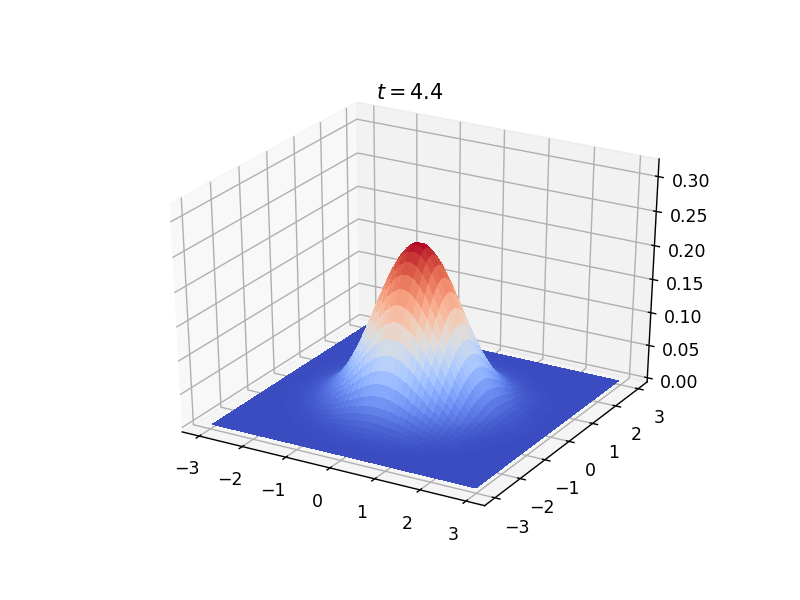

In [8]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.animation as animation

proba_density = np.abs(psi)**2

# To restrict the xy domain to the intesresting part for plot
xydomain = np.logical_and.reduce([x>-3, x<3, y>-3, y<3])
Mplot = int(np.sqrt(np.sum(xydomain))) # the new M for the restricted arrays ; np.sum(xydomain) should be a perfect square

xplot = np.reshape(x[xydomain],(Mplot,Mplot))
yplot = np.reshape(y[xydomain],(Mplot,Mplot))

psiplot = np.empty((len(proba_density), Mplot, Mplot))
for i in range(len(psiplot)):
    psiplot[i] = np.reshape(proba_density[i][xydomain],(Mplot,Mplot))

zmax=np.max(psiplot)

# Plot
fig = plt.figure()
ax = fig.gca(projection='3d')

nstep = 100 # number of frames of the animation ; must be smaller than len(t)
m = 1.5 # 1/m is the fraction of the total time t.max that we want to plot

# The function to use for FuncAnimation
def step(s):
    ax.cla()
    ax.set_zlim3d(0, zmax)
    i=int((s*len(t)/nstep+1)/m)
    
    surf = ax.plot_surface(xplot, yplot, psiplot[i], cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
    ax.set_title(r"$t={:.3}$".format(i*Dt))
   
animation.FuncAnimation(fig,step,nstep, interval=30,repeat=False)

In the following we determine the variance of the condensate width in the $x$ and $y$ direction as:
$$
\sigma_x=\sqrt{\langle(x-\langle x \rangle)^2\rangle}, \sigma_y=\sqrt{\langle(y-\langle y \rangle)^2\rangle}
$$
where
$$
\langle f\rangle=\int_\mathcal{R^2}f(\vec{x}) |\psi(\vec{x},t)|^2
$$

In [9]:
def mean_value(f,psi,a,b,M):
    deltax=np.abs(b-a)/M
    deltay=deltax
    dA=deltax*deltay
    x=np.linspace(a,b,M,endpoint=False)
    y=np.linspace(a,b,M,endpoint=False)
    x,y=np.meshgrid(x,y,sparse=False,indexing="ij")
    return np.sum(f(x,y)*np.abs(psi)**2)*dA


In [10]:
f1=lambda x,y: x
f2=lambda x,y: x**2
sigma=np.array([np.sqrt(mean_value(f2,psi[i],a,b,M)-mean_value(f1,psi[i],a,b,M)**2)
 for i in range(len(t))])

<IPython.core.display.Javascript object>


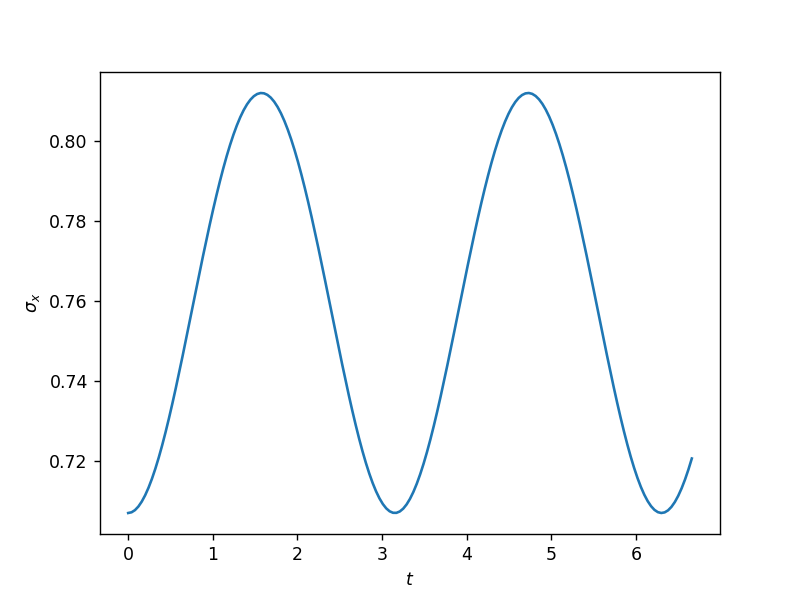

Text(0, 0.5, '$\\sigma_x$')

In [11]:
plt.figure()
plt.plot(t,sigma)
plt.xlabel(r'$t$')
plt.ylabel(r'$\sigma_x$')

In [31]:
Id = lambda x,y : 1.

norm2_psi = np.array([mean_value(Id,psi[i],a,b,M) for i in range(len(t))])

<IPython.core.display.Javascript object>


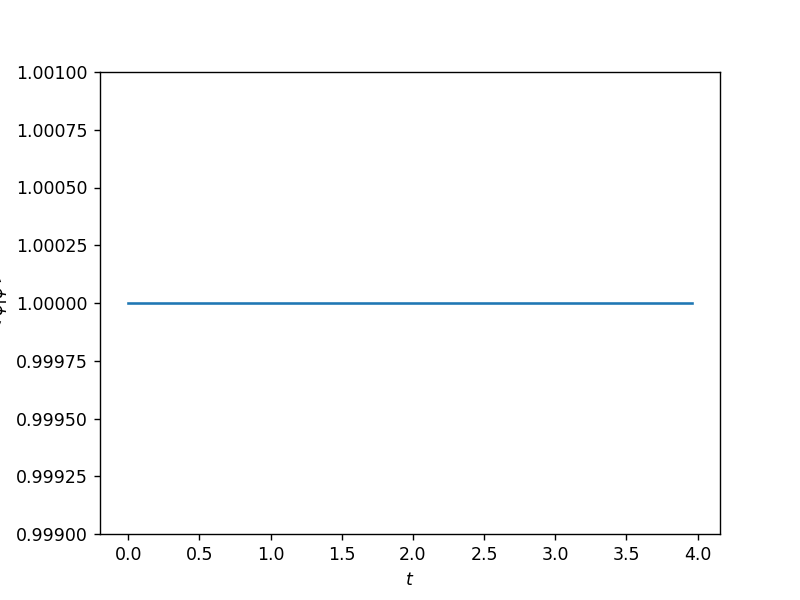

(0.999, 1.001)

In [32]:
plt.figure()
plt.plot(t,norm2_psi)
plt.xlabel(r'$t$')
plt.ylabel(r'$<\psi|\psi>$')
plt.ylim(0.999,1.001)

In [16]:
print(norm2_psi[0])

1.0000000000000002
